In [53]:
!pip uninstall seaborn matplotlib

^C


In [ ]:
!pip install seaborn matplotlib

## Import the libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the data set we will be working with

In [5]:
df = pd.read_csv("data/bank-additional.csv",sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the results of ``describe()``, there might be need of scaling for some of the features. For example ``age`` has a mean of 40.11, ranging from 18 to 88 whereas ``euribor3m``has a mean of 3 and it ranges from 0.63 to 5.04. Data scaling is beneficial for models like __Logistic Regression__, __K-nearest Neighbours__ and __Neural Networks__.

In [10]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


No missing values in the data set.

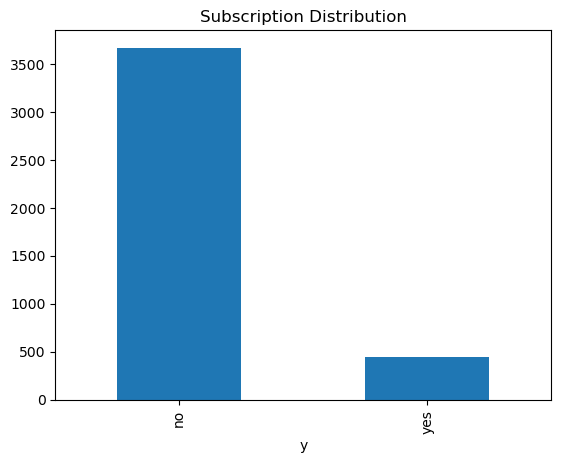

In [16]:
# Target variable distribution
df['y'].value_counts().plot(kind='bar', title='Subscription Distribution')
plt.show()

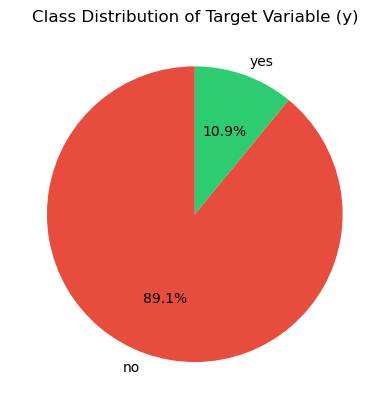

In [21]:
# Class Imbalance Visualization
df['y'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#E74C3C', '#2ECC71'])
plt.title('Class Distribution of Target Variable (y)')
plt.ylabel('')  # Hide the y-label
plt.show()

We can see that there is a clear imbalancy in the target variable. We should handle this before training our model.

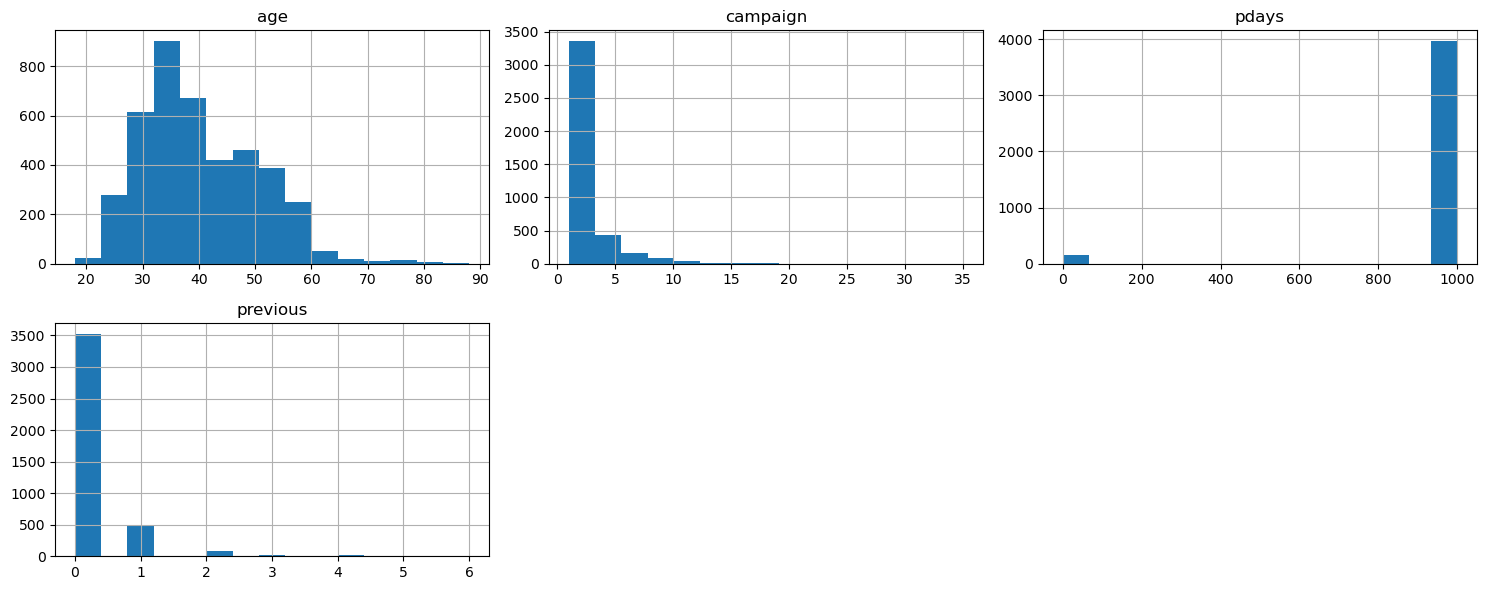

In [15]:
# List of numerical columns to plot
numerical_cols = ['age', 'campaign', 'pdays', 'previous']

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

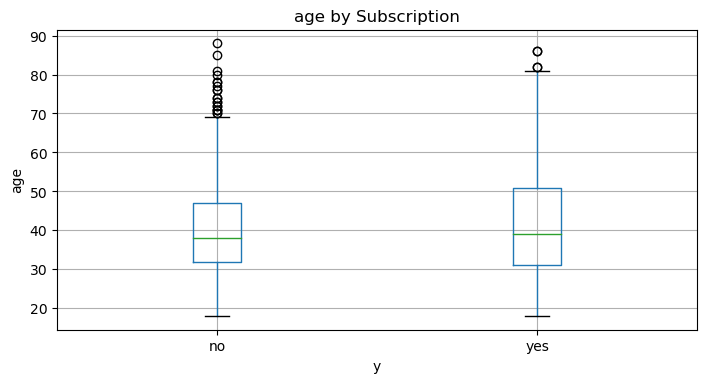

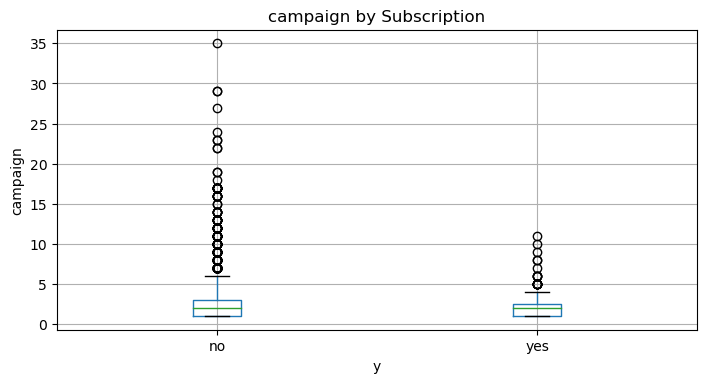

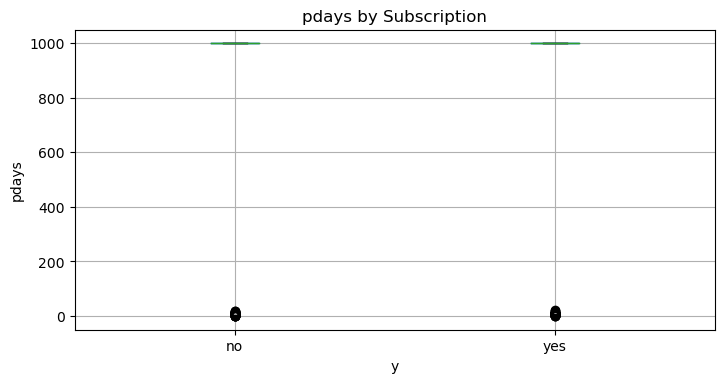

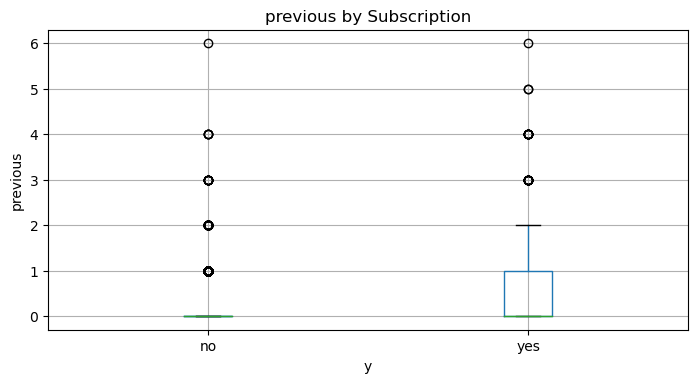

In [17]:
# Boxplots for numeric features by target variable
for col in ['age', 'campaign', 'pdays', 'previous']:
    df.boxplot(column=col, by='y', figsize=(8, 4))
    plt.title(f"{col} by Subscription")
    plt.suptitle('')  # That's to remove the default 'Boxplot grouped by y' title
    plt.ylabel(col)
    plt.show()

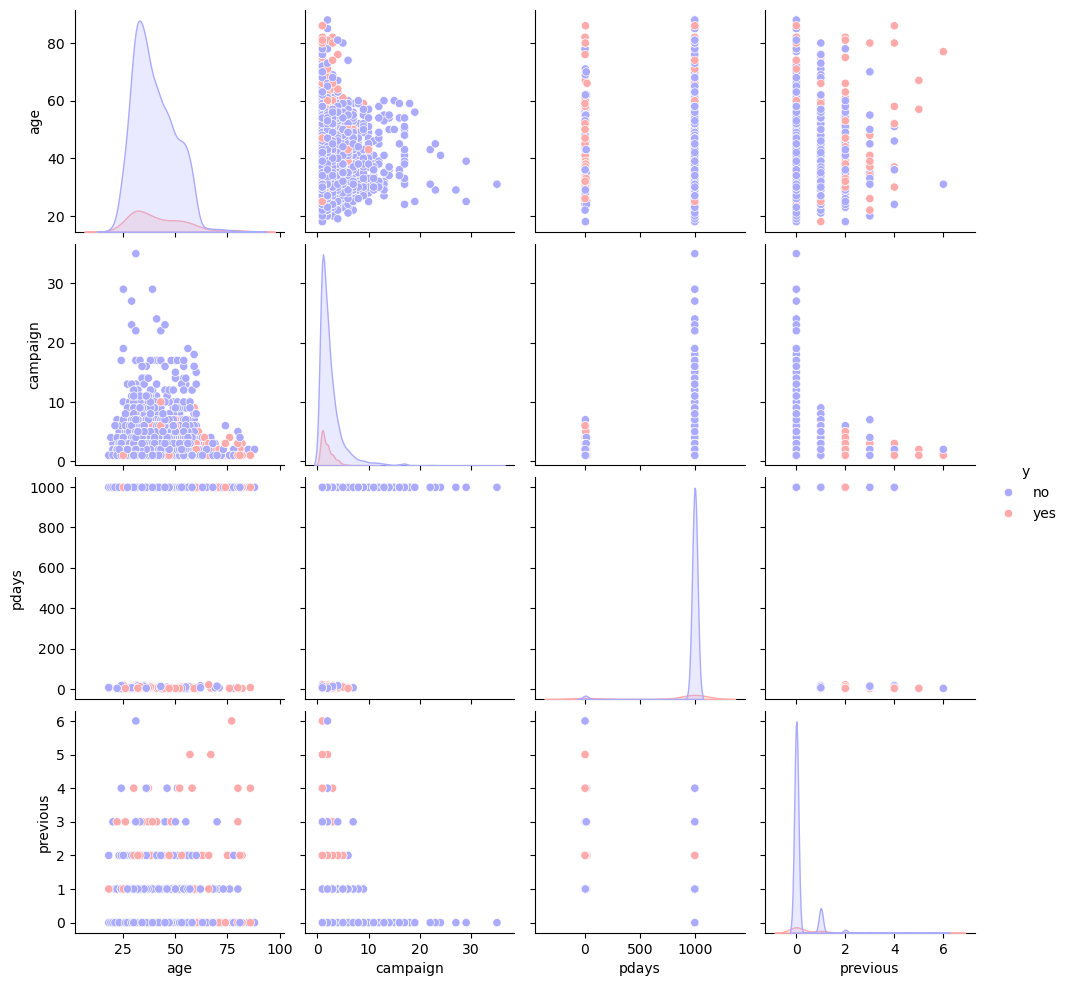

In [22]:
sns.pairplot(df, vars=['age', 'campaign', 'pdays', 'previous'], hue='y', palette='bwr')
plt.show()

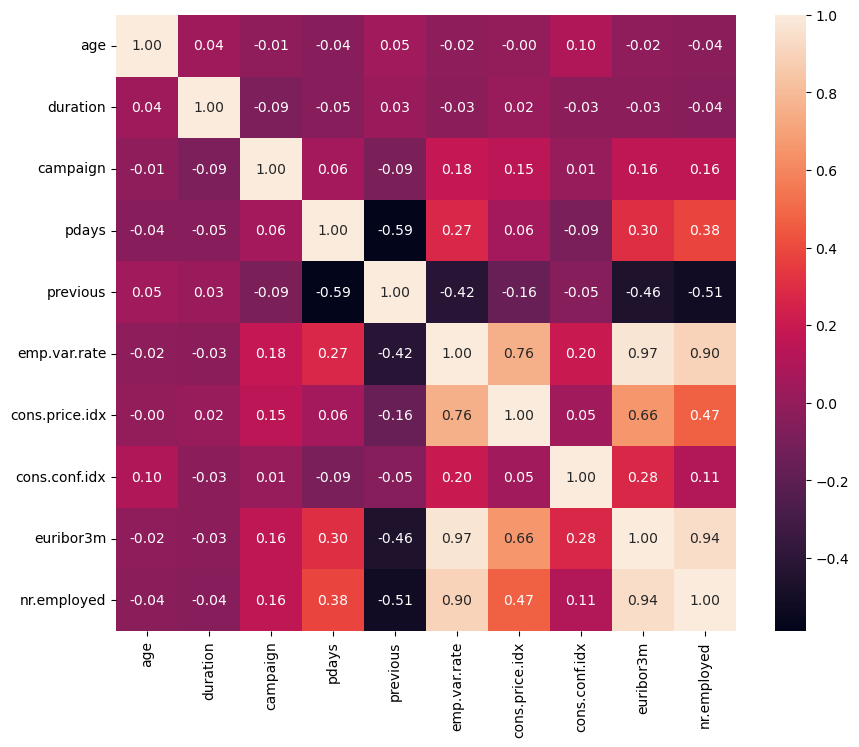

In [18]:
# Heatmap for the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f")
plt.show()

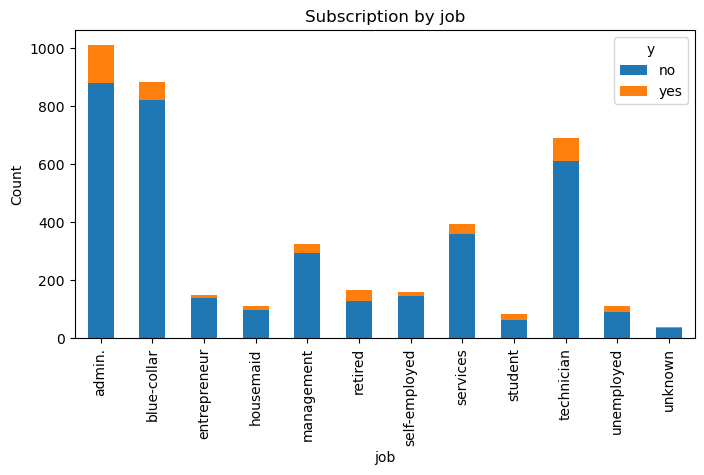

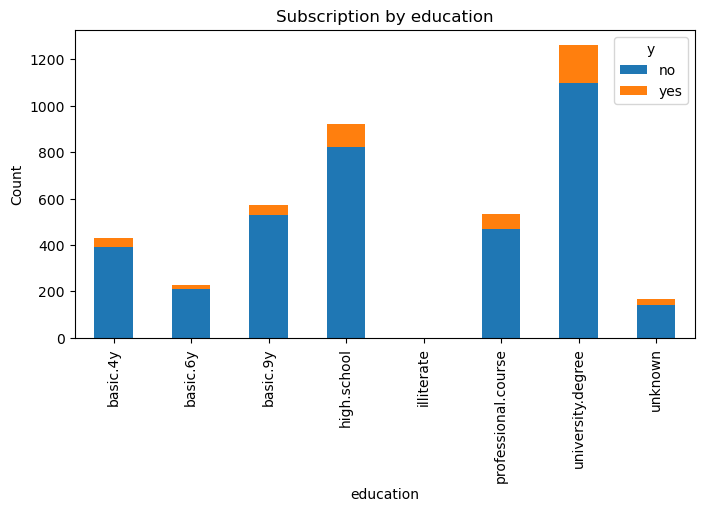

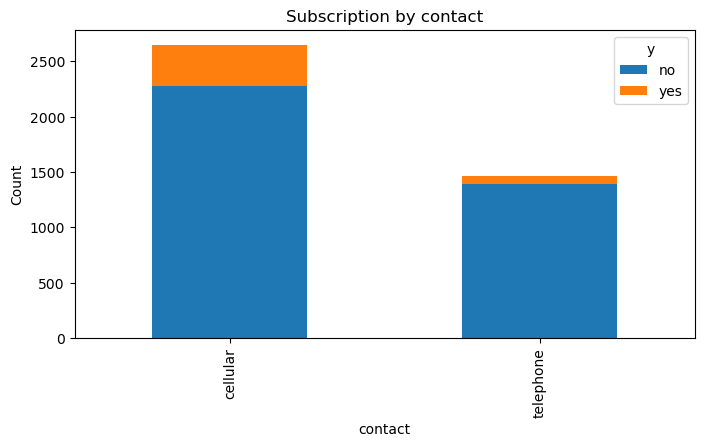

In [19]:
# Bar charts for key categorical features
key_categorical_cols = ['job', 'education', 'contact']
for col in key_categorical_cols:
    pd.crosstab(df[col], df['y']).plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"Subscription by {col}")
    plt.ylabel('Count')
    plt.show()

## Do Feature Engineering

### Data Scaling:
These are candidates for data scaling:
- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed  
Categorical columns (usually of object type) should not be scaled.  
Here is a template for scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Select only the numerical columns for scaling
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_numerical = df[numerical_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and then transform it
df_scaled = scaler.fit_transform(df_numerical)

# Create a new DataFrame with the scaled data
# Note that this will result in a NumPy array, so we convert it back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# If you want to add the scaled data back into the original DataFrame,
# you can drop the original columns and then concatenate the new scaled DataFrame
df = df.drop(columns=numerical_cols, axis=1)
df = pd.concat([df, df_scaled], axis=1)

__Note that, you should perform scaling after splitting your data into training and testing sets to prevent data leakage.__  
This means you should fit the StandardScaler on the training data and then use it to transform both the training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('y', axis=1)  # Assuming 'y' is the target column
y = df['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Overwrite the numerical columns in the original X_train and X_test DataFrames
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

### Template for Model Training

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset (assuming you've loaded the data into a DataFrame df)
# df = pd.read_csv('path_to_your_data.csv', sep=';')

# Drop the 'duration' column
df = df.drop('duration', axis=1)

# Define the categorical columns that you will need to encode
categorical_cols = df.select_dtypes(include=['object']).drop(['y'], axis=1).columns.tolist()

# Define the numerical columns (already numeric in the dataset)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model (replace with your chosen model)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Remove the output target from the feature set
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Encode the target variable

# Split the dataset into training and validation datasets
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model
# my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
# preds = my_pipeline.predict(X_valid)

# Evaluate the model
# from sklearn.metrics import accuracy_score
# score = accuracy_score(y_valid, preds)
# print('Accuracy:', score)


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [59]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [45]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [46]:
df["y"].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

<AxesSubplot:title={'center':'Distribution'}, xlabel='y'>

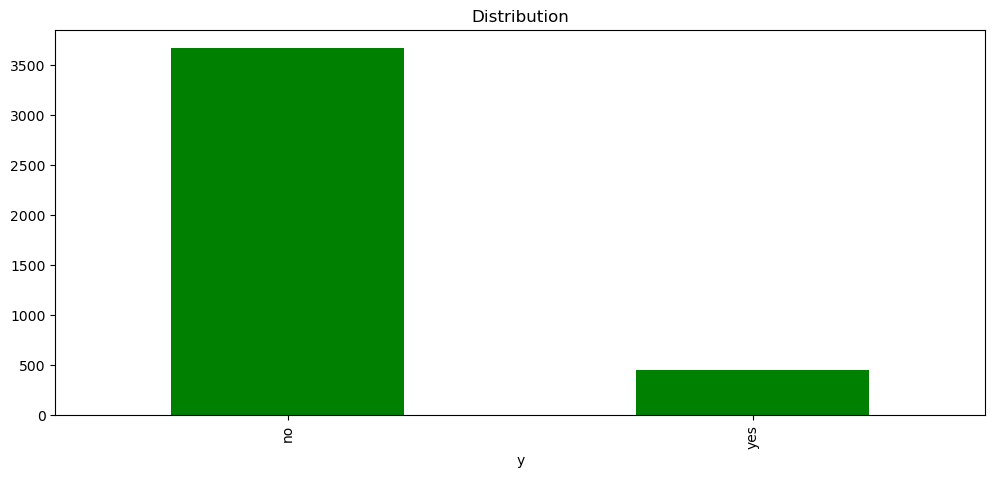

In [11]:
df['y'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

It seems like there is an imbalance between number of "yes" and "no"s. We should handle this imbalancy in the preprocessing step for our model to be successful.

<AxesSubplot:>

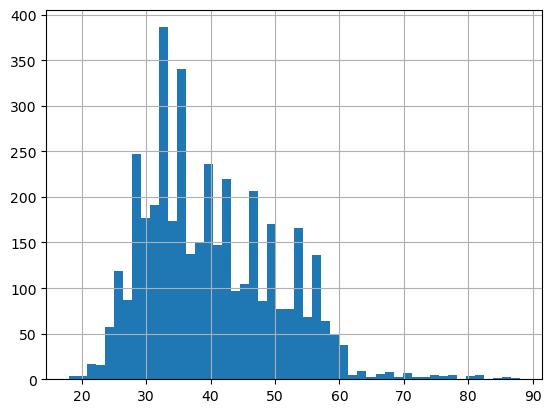

In [30]:
df['age'].hist(bins=50)

<AxesSubplot:title={'center':'age'}, xlabel='y'>

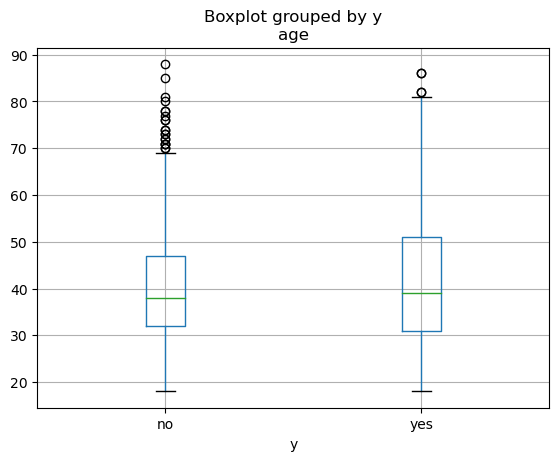

In [31]:
df.boxplot(column='age', by='y')

<AxesSubplot:xlabel='job'>

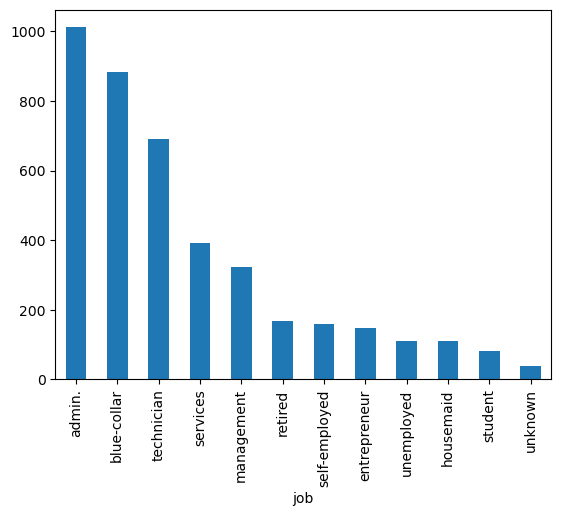

In [32]:
df['job'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='job'>

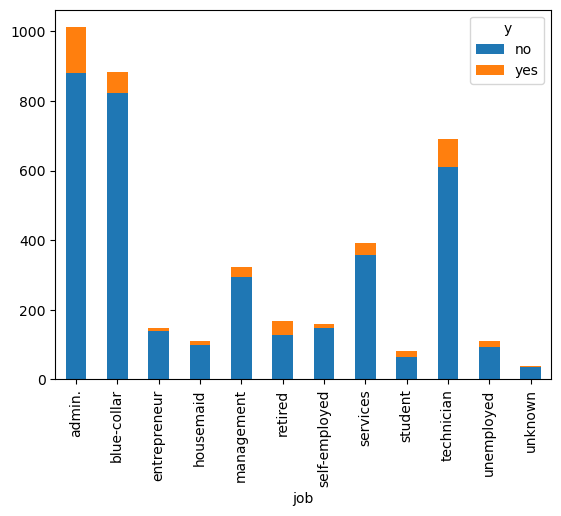

In [34]:
pd.crosstab(df['job'], df['y']).plot(kind='bar', stacked=True)

<AxesSubplot:>

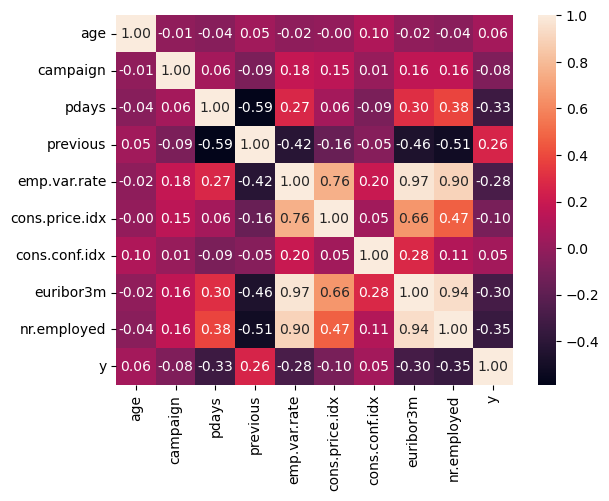

In [47]:
# First, select only the numeric columns of the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Now, you can safely calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Then, plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [41]:
corr_matrix

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
campaign,-0.014169,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

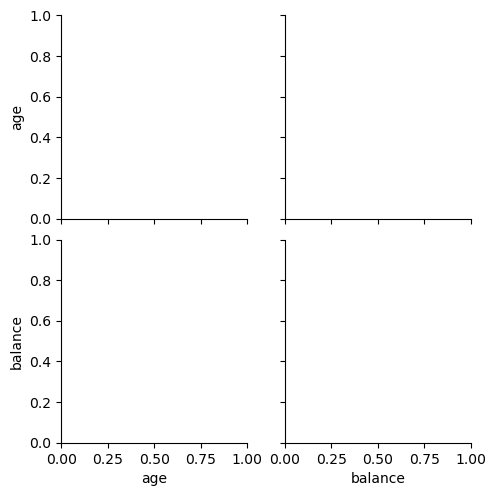

In [52]:
sns.pairplot(df, vars=['age', 'balance'], hue='y')

### Preprocessing

1- 

### Logistic Regression

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_csv('bank-additional.csv', sep = ';')  # Replace with your dataset path
corr_matrix = df.corr()

# Assuming df is your DataFrame
# Loop through each column in the DataFrame
df = df.drop(['contact', 'month', 'day_of_week', 'duration'], axis=1)

# Handle missing values (if any)
# df.fillna(method='ffill', inplace=True)

# Assume df is your DataFrame and already loaded.

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = encoder.get_feature_names_out()  # Updated for newer versions of scikit-learn

# Drop original categorical columns and concatenate the encoded ones
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

# Feature selection (excluding 'duration' for a realistic model)
features = df.drop(['y'], axis=1)
target = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Ensure the target is encoded as 0 and 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and train the model with class_weight set to 'balanced'
model = LogisticRegression(max_iter=6000, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


ValueError: could not convert string to float: 'blue-collar'

#### Results:

### Random Forest

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_csv('bank-additional.csv', sep = ';')  # Replace with your dataset path


# Assuming df is your DataFrame
# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

df = df.drop(['contact', 'month', 'day_of_week', 'duration'], axis=1)

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = encoder.get_feature_names_out()  # Updated for newer versions of scikit-learn

# Drop original categorical columns and concatenate the encoded ones
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

# Feature selection (excluding 'duration' for a realistic model)
features = df.drop(['y'], axis=1)
target = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Ensure the target is encoded as 0 and 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and train the Random Forest model
# Note: 'class_weight' is set to 'balanced' to handle the class imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
rf_predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Accuracy: 0.8956310679611651
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.61      0.18      0.28        92

    accuracy                           0.90       824
   macro avg       0.76      0.58      0.61       824
weighted avg       0.87      0.90      0.87       824



### Neural Networks

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_csv('bank-additional.csv', sep = ';')  # Replace with your dataset path


# Assuming df is your DataFrame
# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

df = df.drop(['contact', 'month', 'day_of_week', 'duration'], axis=1)


# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = encoder.get_feature_names_out()  # Updated for newer versions of scikit-learn

# Drop original categorical columns and concatenate the encoded ones
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

# Feature selection (excluding 'duration' for a realistic model)
features = df.drop(['y'], axis=1)
target = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Ensure the target is encoded as 0 and 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and train the neural network model
# Here we'll just start with one hidden layer with 100 neurons
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions and evaluate the model
nn_predictions = nn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions))


Accuracy: 0.5097087378640777
              precision    recall  f1-score   support

           0       0.94      0.48      0.63       732
           1       0.15      0.76      0.26        92

    accuracy                           0.51       824
   macro avg       0.55      0.62      0.45       824
weighted avg       0.85      0.51      0.59       824



In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their respective ranges to consider
# For logistic regression, 'C' is the inverse of regularization strength;
# smaller values specify stronger regularization.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers to consider
    # You can add more hyperparameters to tune
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=6000, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='f1',  # Consider other scoring metrics as well
    verbose=1,  # For logging output
    n_jobs=-1  # Use all CPU cores
)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Use the best model found to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Best hyperparameters: {'C': 1, 'solver': 'newton-cg'}
Accuracy: 0.7742718446601942
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       732
           1       0.28      0.63      0.38        92

    accuracy                           0.77       824
   macro avg       0.61      0.71      0.62       824
weighted avg       0.87      0.77      0.81       824



C:\Users\harun\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\harun\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [97]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8992718446601942
              precision    recall  f1-score   support

          no       0.91      0.99      0.95       732
         yes       0.68      0.18      0.29        92

    accuracy                           0.90       824
   macro avg       0.79      0.59      0.62       824
weighted avg       0.88      0.90      0.87       824



In [90]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,no,yes,no,487,2,999,0,-1.8,92.893,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39,no,no,no,346,4,999,0,1.1,93.994,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,no,yes,no,227,1,999,0,1.4,94.465,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,no,unknown,unknown,17,3,999,0,1.4,94.465,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,47,no,yes,no,58,1,999,0,-0.1,93.200,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
